In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
# Read a pandas DataFrame
#df = pd.read_csv("C:\jintu\Formated data_resampled 1H ID1\six months.csv")
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,44.500000,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,265430.890775,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609


In [6]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# Baseline models:
  

## NAIVE SEASONAL

In [10]:
from darts.models import NaiveSeasonal

In [11]:
train_size1 = int(len(series1) * 0.8)
train_1, test_1 = series1[:train_size1], series1[train_size1:]
model = NaiveSeasonal()
model.fit(train_1)

NaiveSeasonal(K=1)

In [16]:

# Forecast for the length of the test set
predlns1 = model.predict(len(test_1))

# Compute the forecast accuracy
from darts.metrics import mape
mape_score = mape(predlns1, test_1)

print(f"MAPE: {mape_score:.2f}%")


MAPE: 7.15%


In [17]:
# Predict for a specified number of future time steps
num_predictions = 1000
future_predictions = model.predict(num_predictions)


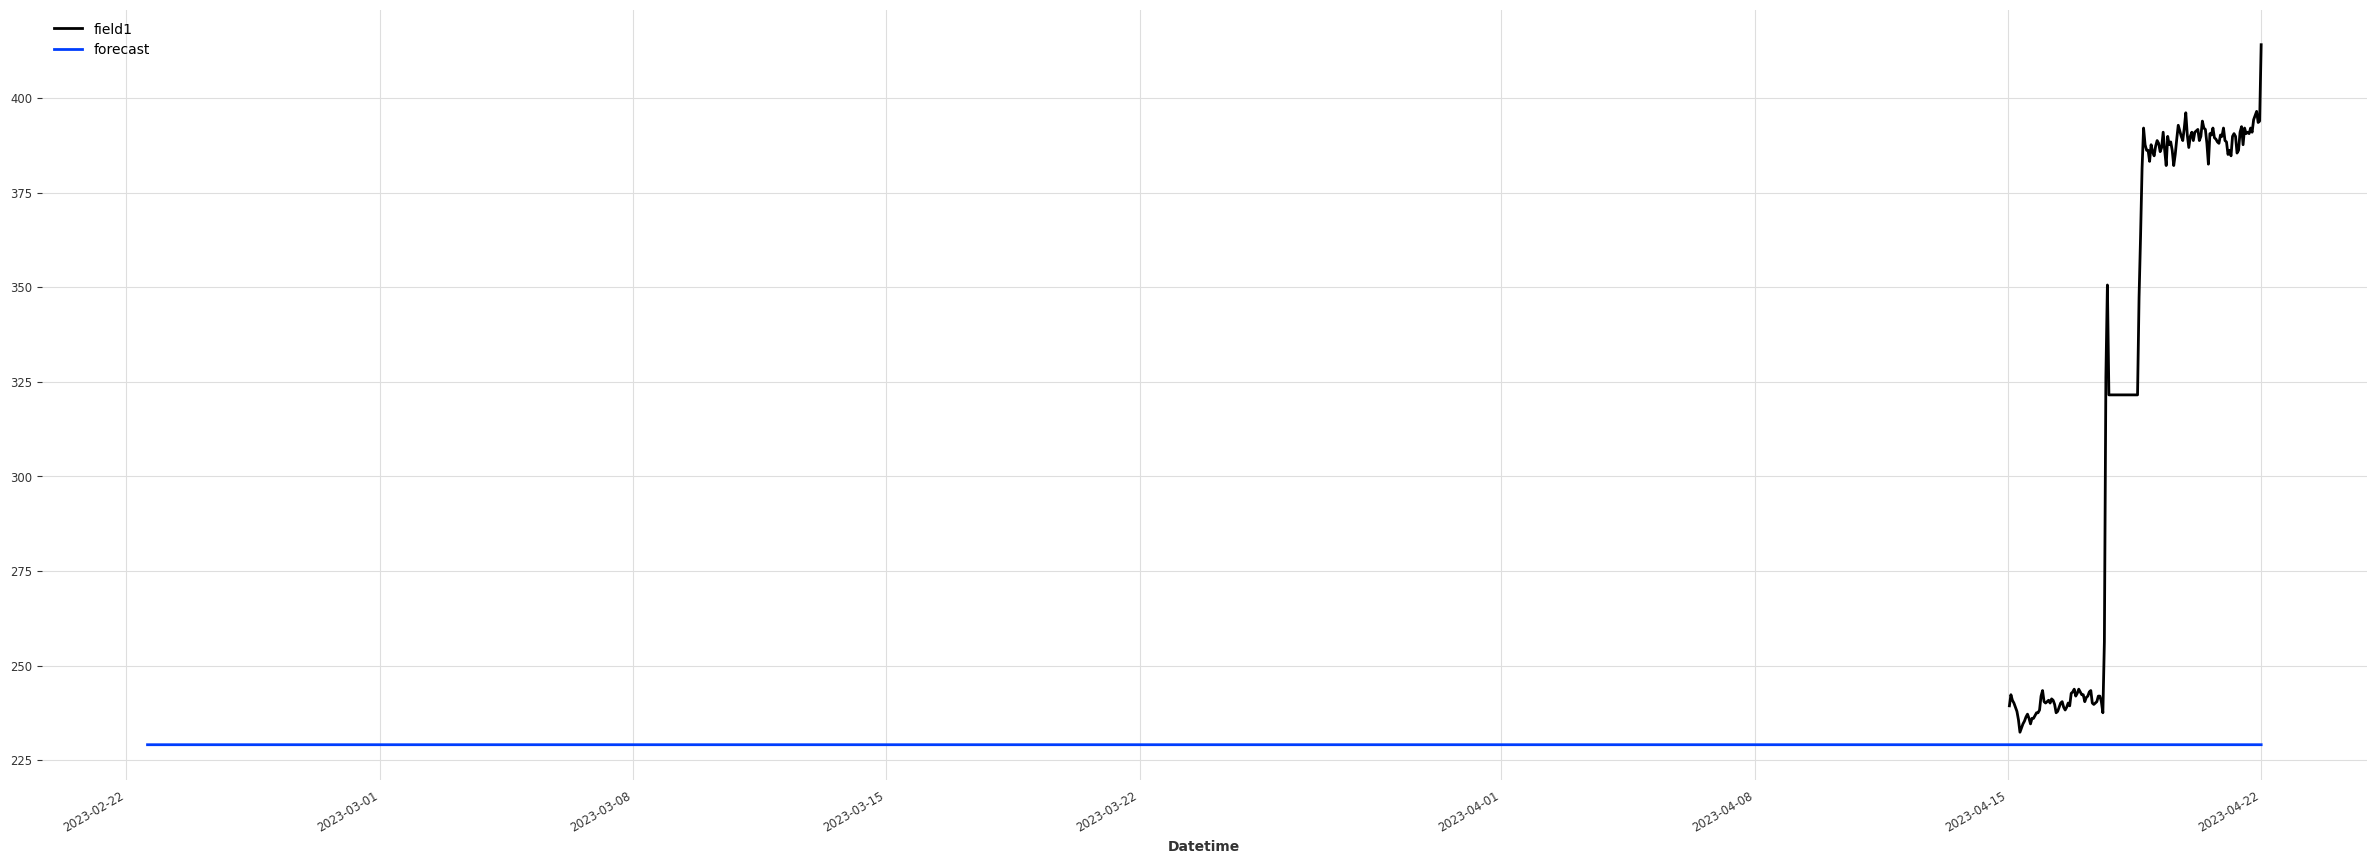

In [18]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val1.plot()
predlns1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [21]:
train_size4 = int(len(series4) * 0.8)
train_4, test_4 = series4[:train_size4], series4[train_size4:]
model = NaiveSeasonal()
model.fit(train_4)

NaiveSeasonal(K=1)

In [22]:

# Forecast for the length of the test set
predlns4 = model.predict(len(test_4))

# Compute the forecast accuracy
from darts.metrics import mape
mape_score = mape(predlns4, test_4)

print(f"MAPE: {mape_score:.2f}%")

MAPE: 13.97%


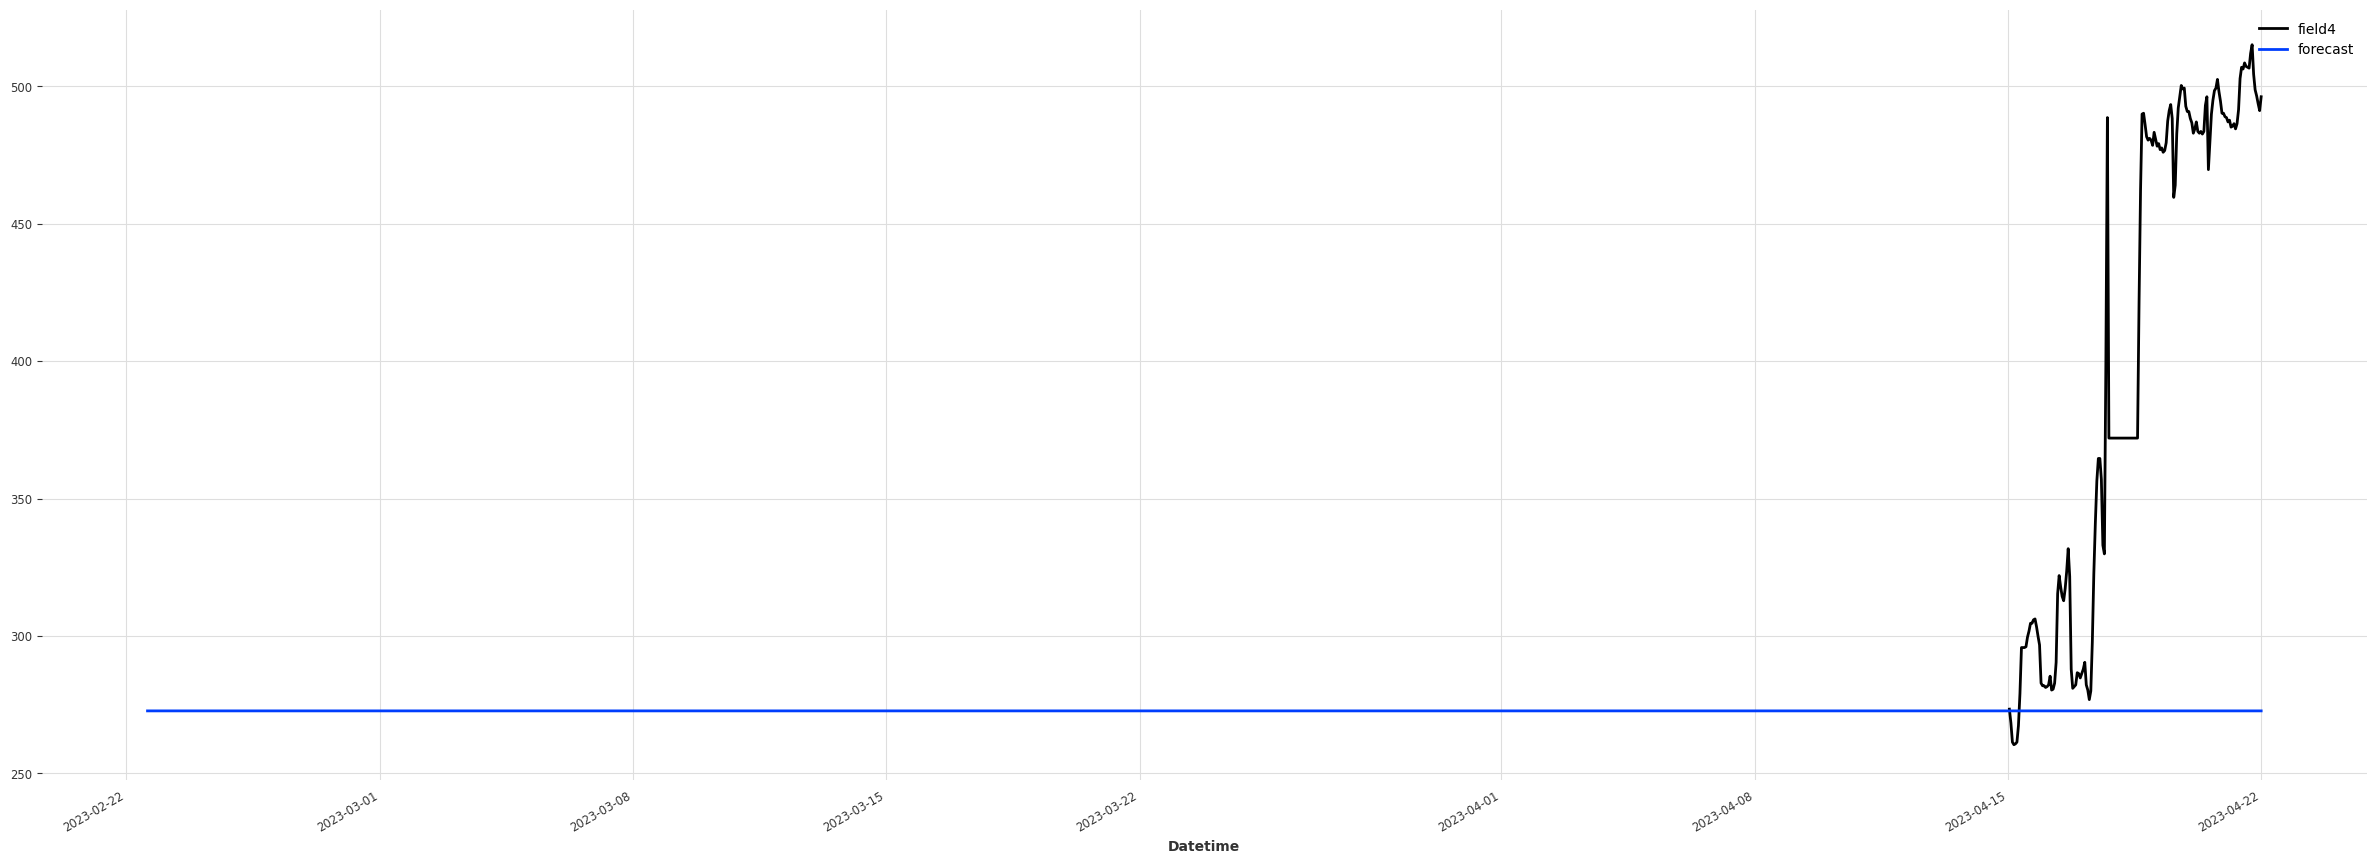

In [23]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val4.plot()
predlns4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

# NaiveDrift  Model

In [26]:
from darts.models import NaiveDrift

In [35]:
train_size1 = int(len(series1) * 0.8)
train_1, test_1 = series1[:train_size1], series1[train_size1:]
model = NaiveDrift()
model.fit(train_1)

NaiveDrift()

In [36]:

# Forecast for the length of the test set
predlnd1 = model.predict(len(test_1))

# Compute the forecast accuracy
from darts.metrics import mape
mape_score = mape(predlnd1, test_1)

print(f"MAPE: {mape_score:.2f}%")

MAPE: 9.86%


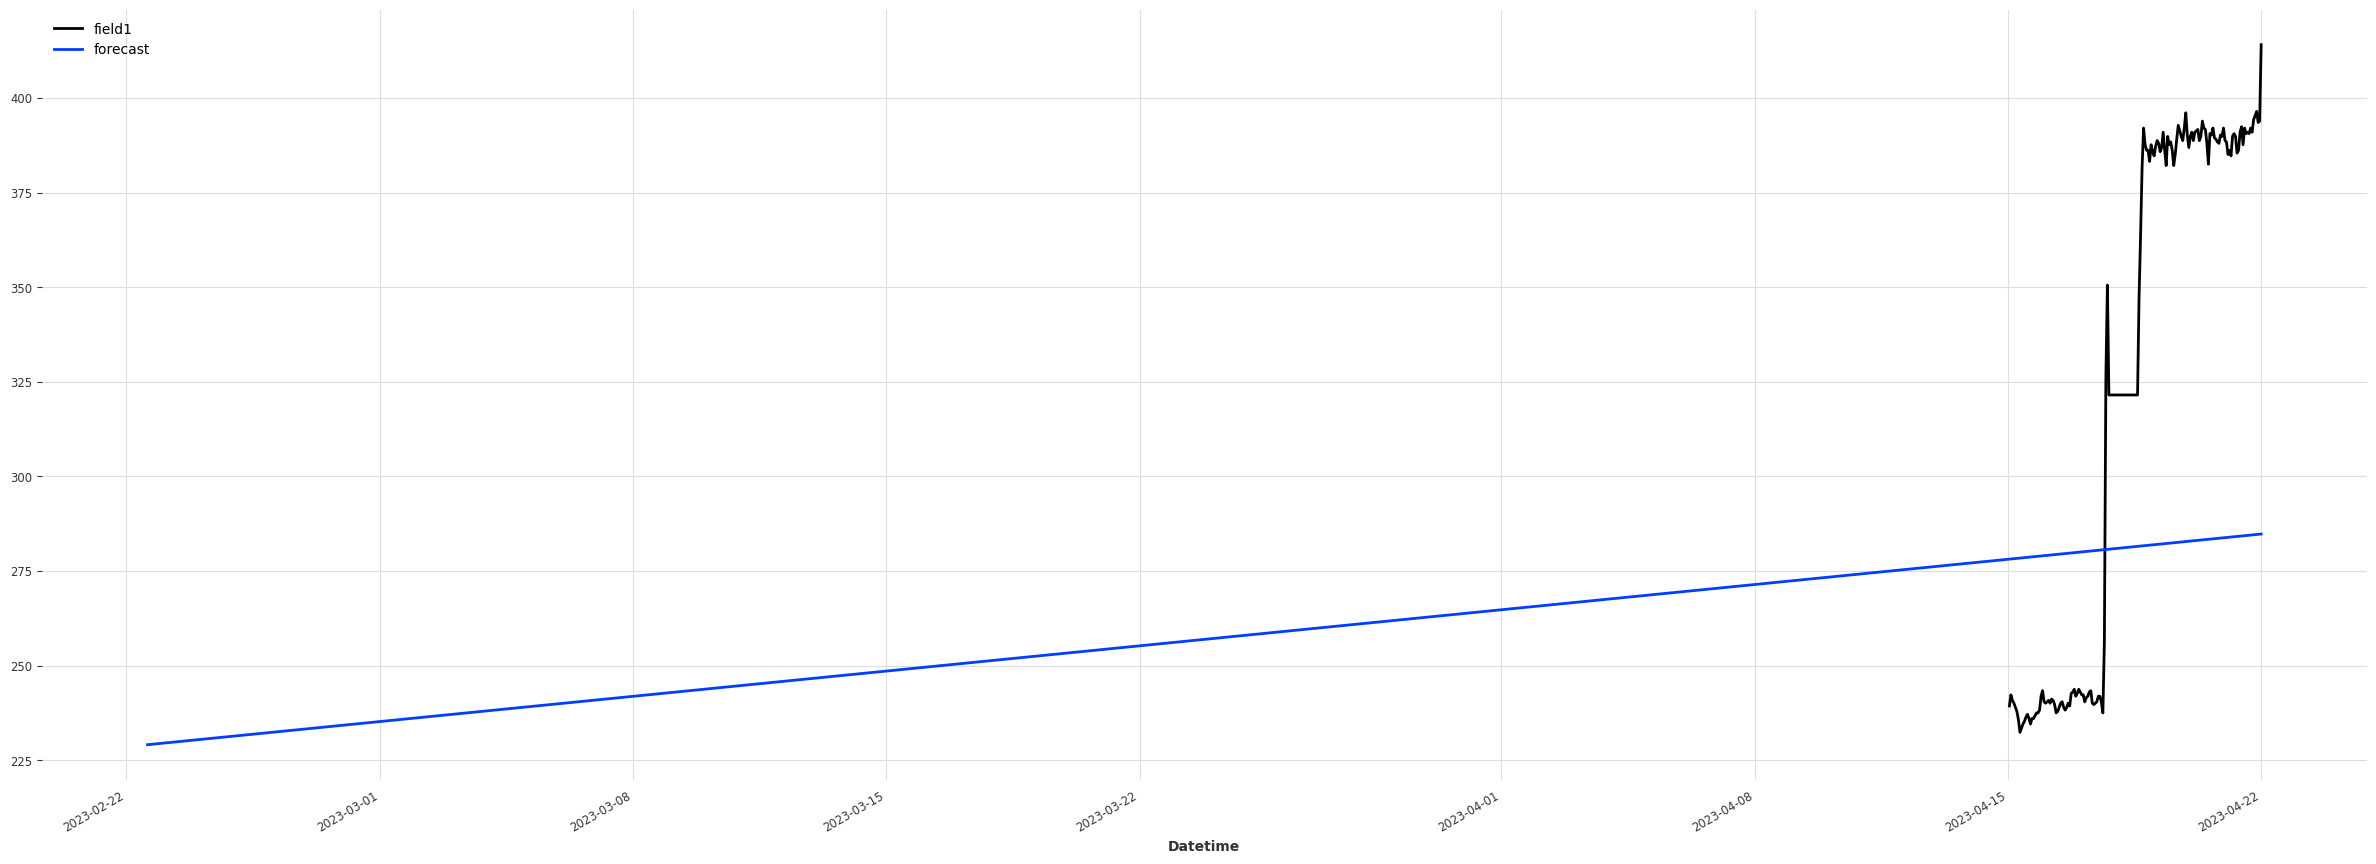

In [37]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val1.plot()
predlnd1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [38]:
train_size2 = int(len(series2) * 0.8)
train_2, test_2 = series2[:train_size2], series2[train_size2:]
model = NaiveDrift()
model.fit(train_2)

NaiveDrift()

In [39]:

# Forecast for the length of the test set
predlnd2 = model.predict(len(test_2))

# Compute the forecast accuracy
from darts.metrics import mape
mape_score = mape(predlnd2, test_2)

print(f"MAPE: {mape_score:.2f}%")

MAPE: 12.71%


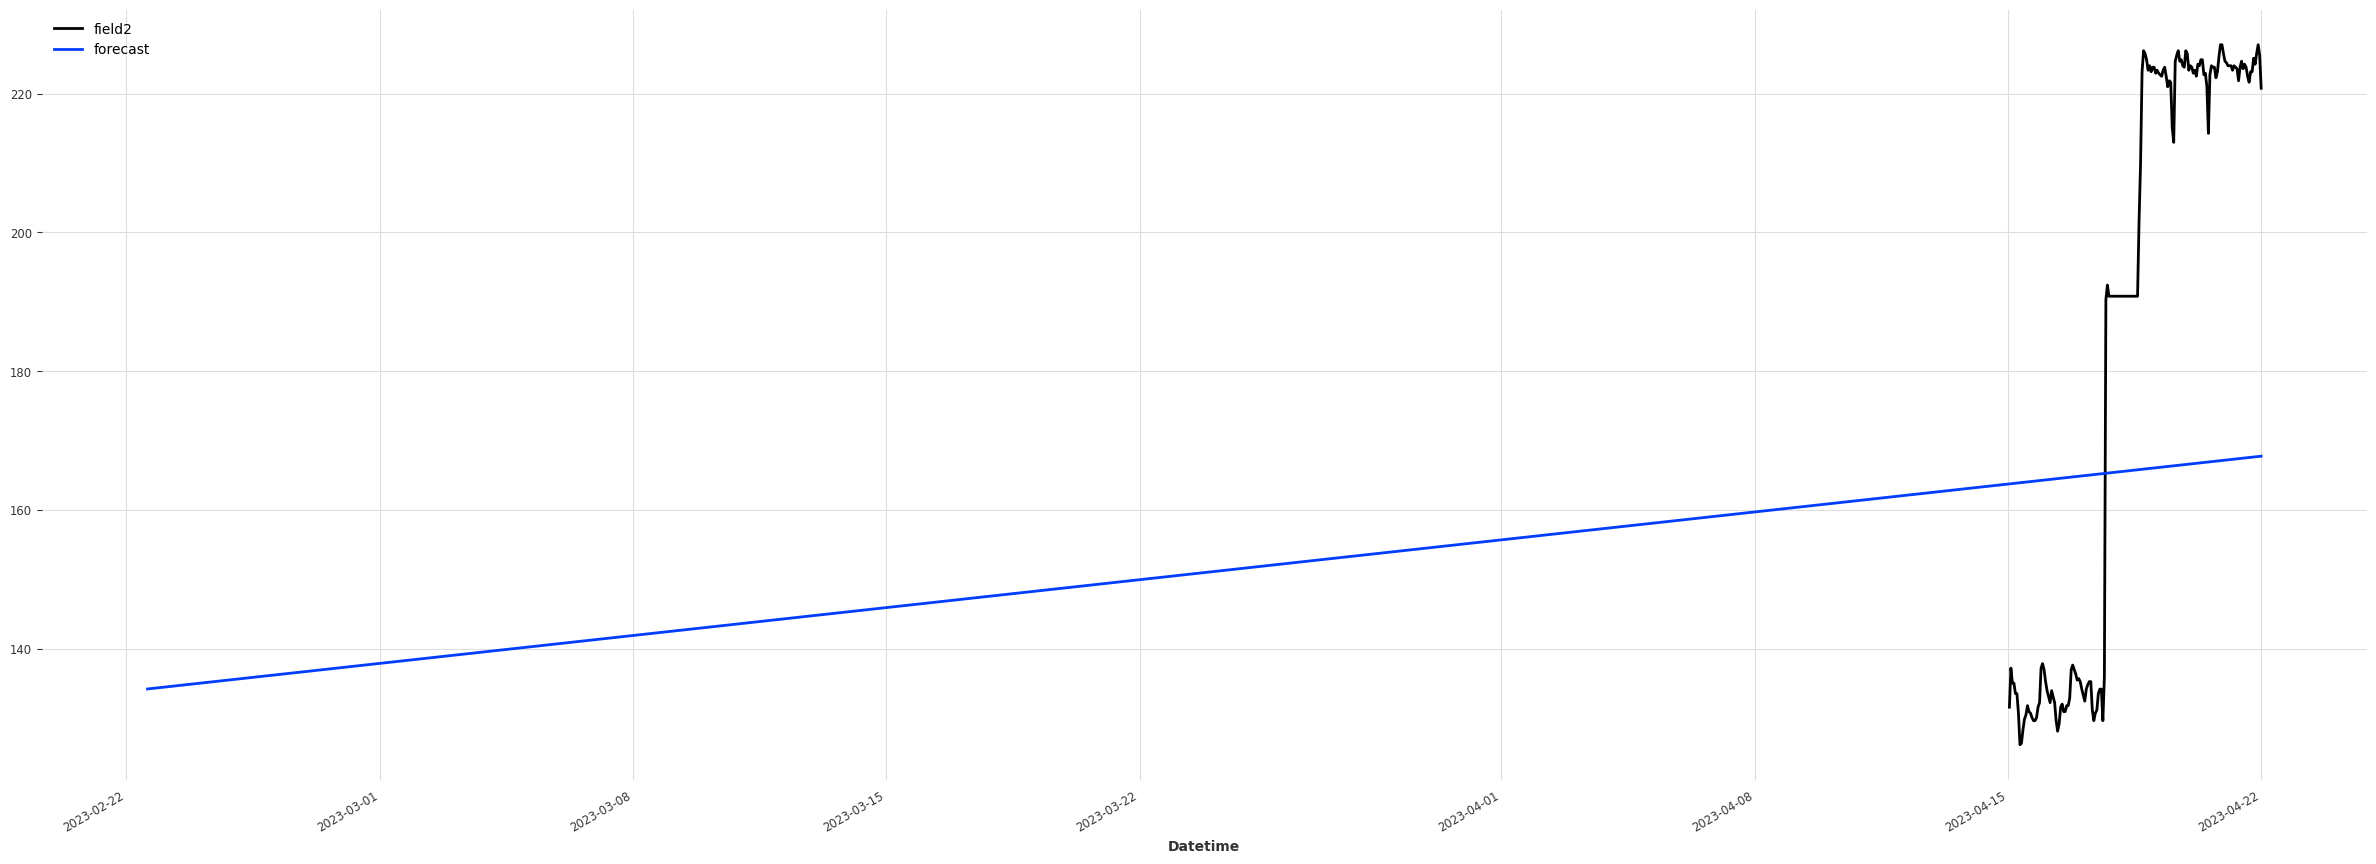

In [40]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val2.plot()
predlnd2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [41]:
train_size8 = int(len(series8) * 0.8)
train_8, test_8 = series8[:train_size8], series8[train_size8:]
model = NaiveDrift()
model.fit(train_8)

NaiveDrift()

In [43]:

# Forecast for the length of the test set
predlnd8 = model.predict(len(test_8))

# Compute the forecast accuracy
from darts.metrics import mape
mape_score = mape(predlnd8, test_8)

print(f"MAPE: {mape_score:.2f}%")

MAPE: 342.12%


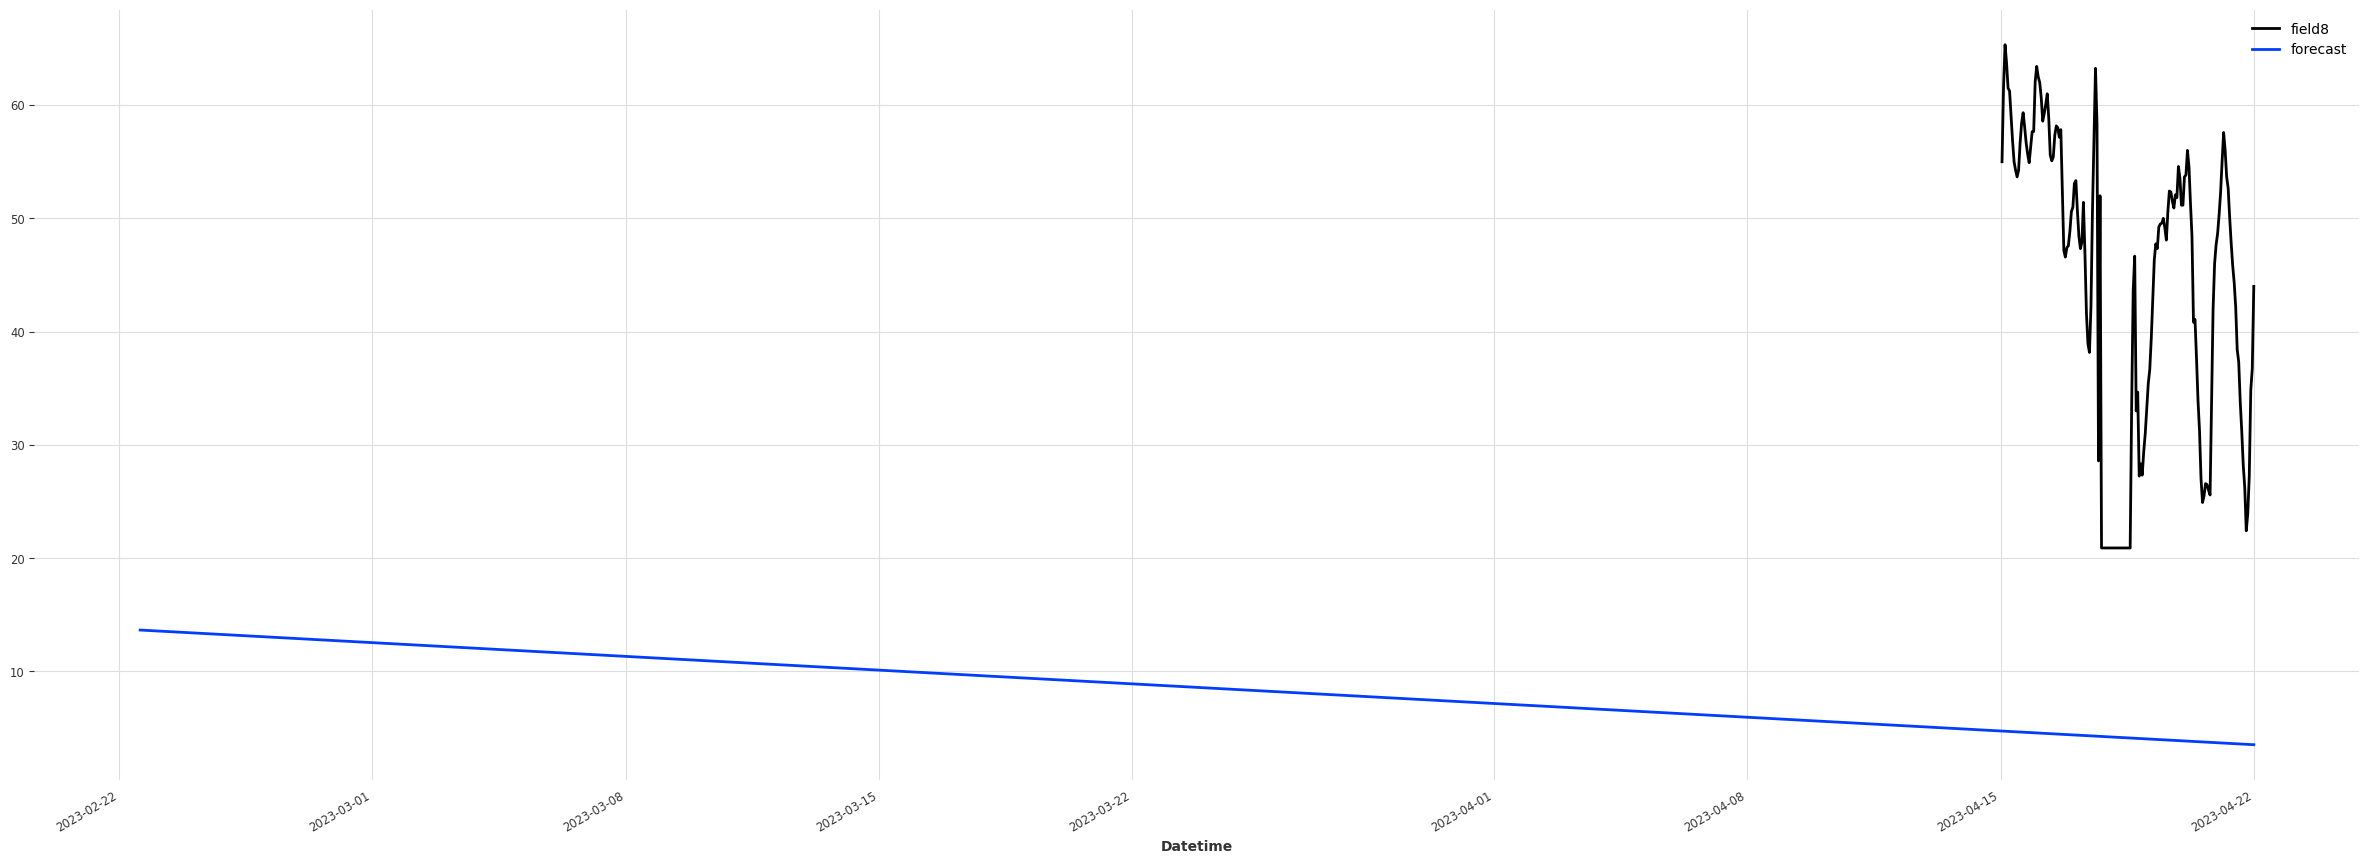

In [44]:
#mean_absolute_error(val,pred)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
val8.plot()
predlnd8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()